In [3]:
'''
Author: Waheed Zarif
Date: 01/22/2020

This model is built with dataset on sold houses in Ames, Iowa. 
Dataset Author: Dean De Cock -> https://www.truman.edu/faculty-staff/decock/
Dataset info: https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627
Column Descriptions: 
    Lot Area: Lot size in square feet.
    Overall Qual: Rates the overall material and finish of the house.
    Overall Cond: Rates the overall condition of the house.
    Year Built: Original construction date.
    Low Qual Fin SF: Low quality finished square feet (all floors).
    Full Bath: Full bathrooms above grade.
    Fireplaces: Number of fireplaces.
Data Documentation: https://s3.amazonaws.com/dq-content/307/data_description.txt

'''

In [4]:
import pandas as pd

In [6]:
# Reading dataset

data = pd.read_csv('AmesHousing.txt', delimiter = '\t')
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [11]:
# Selecting train and test set, 
train = data.iloc[:1460,:]
test = data.iloc[1460:,:]
# target column
target = 'SalePrice'
data.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

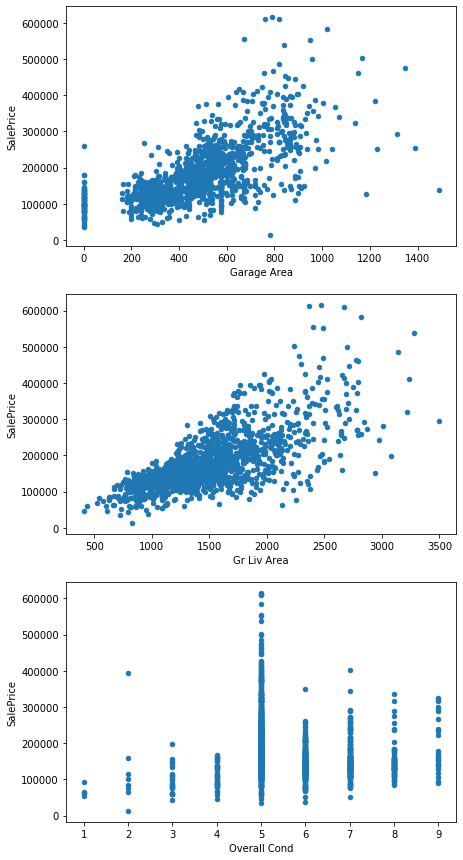

In [13]:
#which feature do we want to use in our model? In linear regression, the assumption is that relationship 
#between feature and target column is linear, we want to find the feature that seems to have the strongest correlation
#with the target (final sales price)
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (7,15))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

train.plot(x='Garage Area', y='SalePrice', ax=ax1, kind='scatter')
train.plot(x='Gr Liv Area', y='SalePrice', ax=ax2, kind='scatter')
train.plot(x='Overall Cond', y='SalePrice', ax=ax3, kind='scatter')
plt.show()
#we can ignore Overall Cond. There's no linear relationship
# but we can focuse on the other two parameter that seem to have a linear relationship with final sales price

In [34]:
#using Linear Regression to find optimal parameter value for our model 
#This is a univariate linear regression model between Gr Liv Area and SalesPrice
from sklearn.linear_model import LinearRegression

x = train[['Gr Liv Area']]
y = train['SalePrice']

#instantiating a linear regression model 
reg = LinearRegression()
reg.fit(x,y)

print('The fitted model can be represeted as y={}*x1 + {}'.format(reg.coef_,reg.intercept_))

The fitted model can be represeted as y=[116.86624683]*x1 + 5366.821710056043


In [35]:
#we can use the above model to predict the target, using the training data and compare to actual SalesPrice
from sklearn.metrics import mean_squared_error
import numpy as np

#predicting target in the train database
pred_train = reg.predict(train[['Gr Liv Area']])
train_rmse = np.sqrt(mean_squared_error(y_true=train['SalePrice'], y_pred=pred_train)) # Root mean squared error

#predicting target in the test databsae
pred_test = reg.predict(test[['Gr Liv Area']])
test_rmse = np.sqrt(mean_squared_error(y_true=test['SalePrice'], y_pred=pred_test))

print('Root Mean Squared Errors (RSME): \n\t-Train database RMSE = {} \n\t-Test database RMSE = {}'.format(train_rmse, test_rmse))

Root Mean Squared Errors (RSME): 
	-Train database RMSE = 56034.362001412796 
	-Test database RMSE = 57088.25161263909


In [69]:
#Multivariete case
# this is in the form of y=a0+a1x1+a2x2+...+anxn
#Let's train the model with two features 'Overall Cond' and 'Gr Liv Area'

cols = ['Overall Cond', 'Gr Liv Area']
x = train[cols]
y = train['SalePrice']
reg = LinearRegression()
reg.fit(x,y)

#predicting target in the train database
pred_train = reg.predict(train[cols])
train_rmse_2 = np.sqrt(mean_squared_error(y_true=train['SalePrice'], y_pred=pred_train)) # Root mean squared error

#predicting target in the test databsae
pred_test = reg.predict(test[cols])
test_rmse_2 = np.sqrt(mean_squared_error(y_true=test['SalePrice'], y_pred=pred_test))
print('Root Mean Squared Errors (RSME): \n\tTrain database RMSE = {} \n\tTest database RMSE = {}\n'.format(train_rmse_2, test_rmse_2))
print('The difference is negligible. It is:\n\t{} points for train database \n\t{} pointsfor test database'.format((round(train_rmse-train_rmse_2)), (round(test_rmse-test_rmse_2))))

Root Mean Squared Errors (RSME): 
	Train database RMSE = 56032.398015258674 
	Test database RMSE = 57066.90779448559

The difference is negligible. It is:
	2.0 points for train database 
	21.0 pointsfor test database


In [52]:
# To imporve the model, we need to select more features. But they ought to be appropriate features. 
# Approach: select from columns that don't have missing values and don't need to be transofrmed to be use
#then use correlation between features and target column to to select features. 

# For example 'Year Built' and 'Year Remod/Add' are two columns that needs to be transformed to be useful, therefore they are dropped.

# What are the column types and shape of the databases. For example what is train database look like?
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            1460 non-null   int64  
 1   PID              1460 non-null   int64  
 2   MS SubClass      1460 non-null   int64  
 3   MS Zoning        1460 non-null   object 
 4   Lot Frontage     1211 non-null   float64
 5   Lot Area         1460 non-null   int64  
 6   Street           1460 non-null   object 
 7   Alley            109 non-null    object 
 8   Lot Shape        1460 non-null   object 
 9   Land Contour     1460 non-null   object 
 10  Utilities        1460 non-null   object 
 11  Lot Config       1460 non-null   object 
 12  Land Slope       1460 non-null   object 
 13  Neighborhood     1460 non-null   object 
 14  Condition 1      1460 non-null   object 
 15  Condition 2      1460 non-null   object 
 16  Bldg Type        1460 non-null   object 
 17  House Style   

In [57]:
# selecting only numerical columns
numerical_train = train.select_dtypes(include=['int64', 'float64'])
numerical_test = test.select_dtypes(include=['int64', 'float64'])
#removing unwanted features from train column
numerical_train = numerical_train.drop(['PID','Year Built', 'Year Remod/Add', 
                                        'Garage Yr Blt', 'Mo Sold', 'Yr Sold'], axis = 1)
cols = numerical_train.columns
cols


Index(['Order', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice'],
      dtype='object')

In [58]:
#calculating missing values from each column in numerical_train
null_series = numerical_train.isnull().sum()
null_series

Order                0
MS SubClass          0
Lot Frontage       249
Lot Area             0
Overall Qual         0
Overall Cond         0
Mas Vnr Area        11
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       1
Bsmt Half Bath       1
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Cars          0
Garage Area          0
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
SalePrice            0
dtype: int64

In [63]:
#Keeping only columns with no missing values
full_cols_series = null_series[null_series==0]
#this is the subset of features we want which are columns with float or integer value and no missing value
full_cols_series

Order              0
MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
SalePrice          0
dtype: int64

In [68]:
#what are the correlation coefficient features and Sale Price? 

train_subset = train[full_cols_series.index]
corrs = train_subset.corr()
price_corr = corrs['SalePrice']
price_corr = abs(price_corr)
sorted_corr = price_corr.sort_values(ascending=False)
sorted_corr

SalePrice          1.000000
Overall Qual       0.804562
Gr Liv Area        0.698990
Garage Cars        0.663485
Garage Area        0.662397
1st Flr SF         0.657119
Full Bath          0.518194
Fireplaces         0.485683
TotRms AbvGrd      0.483701
Open Porch SF      0.344383
Wood Deck SF       0.319104
Lot Area           0.274730
Half Bath          0.272870
2nd Flr SF         0.202352
Enclosed Porch     0.165873
Pool Area          0.145474
Kitchen AbvGr      0.130843
Bedroom AbvGr      0.106941
Screen Porch       0.100121
Overall Cond       0.099395
MS SubClass        0.088504
Order              0.068181
Low Qual Fin SF    0.060352
3Ssn Porch         0.038699
Misc Val           0.009903
Name: SalePrice, dtype: float64

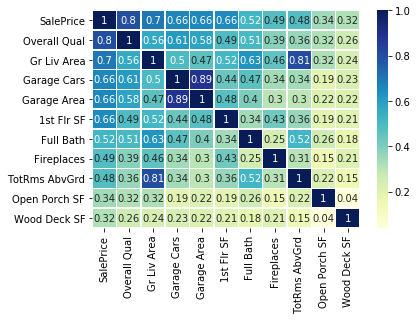

In [80]:
#Are there potential colinearity between some of the feature columns? 
# a heatmat will show.
import seaborn as sns

#Some columns above shows very weak correlations i.e., Misc Val = 0.009903. Let's drop weak correlations. 
#Thats any column with corr < 3. This is arbituarary number, but a good start nonetheless
strong_corrs = sorted_corr[sorted_corr>0.3]
train_cols = strong_corrs.index
corrmat = train_subset[train_cols].corr()
sns.heatmap(corrmat, annot=True, linewidths=.5, cmap="YlGnBu")

#6-4-3-3